# pyGDAL

In [1]:
from osgeo import gdal #dane rastrowe
from osgeo import ogr #dane wektorowe
from osgeo import osr #układy współrzędnych
from osgeo import gdal_array #tablica gdal
import gdal #można też wczytać w ten sposób jednak dostaniemy informację, że ta metoda jest przestarzała
import os
import numpy as np
from matplotlib import pyplot
import rasterio
from rasterio.plot import show, show_hist



#path="A:\cloud\SynologyDrive\Drive\zut_dropbox\dydaktyka\gis_informatyka\cwiczenie11" 
path=r"." 
file="puszcza_bukowa_szmaragdowe.asc"
plik=os.path.join(path,file)
print(plik)

.\puszcza_bukowa_szmaragdowe.asc


Aby wgrać dane rastrowe musimy najpierw załadować DRIVER GDAL, który inicjuje dany obiekt w określonej strukturze danych. Ponizsza komenda inicjuje od razu wszystkie sterowniki, jednak służy jedynie do odczytu danych. Aby zapisać należy zainicjować odpowiedni sterownik..

In [2]:
gdal.AllRegister()

In [3]:
driver_list = []
for i in range(gdal.GetDriverCount()):
    driver = gdal.GetDriver(i)
    driver_list.append(driver.GetDescription())

# lista sterowników
driver_list = [gdal.GetDriver(i).GetDescription() for i in range(gdal.GetDriverCount())]
print(driver_list)
drv_count = gdal.GetDriverCount()
print('liczba zarejestrowanych sterowników GDAL=',drv_count)

['VRT', 'DERIVED', 'GTiff', 'NITF', 'RPFTOC', 'ECRGTOC', 'HFA', 'SAR_CEOS', 'CEOS', 'JAXAPALSAR', 'GFF', 'ELAS', 'AIG', 'AAIGrid', 'GRASSASCIIGrid', 'SDTS', 'DTED', 'PNG', 'JPEG', 'MEM', 'JDEM', 'GIF', 'BIGGIF', 'ESAT', 'FITS', 'BSB', 'XPM', 'BMP', 'DIMAP', 'AirSAR', 'RS2', 'SAFE', 'PCIDSK', 'PCRaster', 'ILWIS', 'SGI', 'SRTMHGT', 'Leveller', 'Terragen', 'GMT', 'netCDF', 'HDF4', 'HDF4Image', 'ISIS3', 'ISIS2', 'PDS', 'PDS4', 'VICAR', 'TIL', 'ERS', 'JP2OpenJPEG', 'L1B', 'FIT', 'GRIB', 'RMF', 'WCS', 'WMS', 'MSGN', 'RST', 'INGR', 'GSAG', 'GSBG', 'GS7BG', 'COSAR', 'TSX', 'COASP', 'R', 'MAP', 'KMLSUPEROVERLAY', 'PDF', 'Rasterlite', 'MBTiles', 'PLMOSAIC', 'CALS', 'WMTS', 'SENTINEL2', 'MRF', 'TileDB', 'PNM', 'DOQ1', 'DOQ2', 'PAux', 'MFF', 'MFF2', 'FujiBAS', 'GSC', 'FAST', 'BT', 'LAN', 'CPG', 'IDA', 'NDF', 'EIR', 'DIPEx', 'LCP', 'GTX', 'LOSLAS', 'NTv1', 'NTv2', 'CTable2', 'ACE2', 'SNODAS', 'KRO', 'ROI_PAC', 'RRASTER', 'BYN', 'ARG', 'RIK', 'USGSDEM', 'GXF', 'KEA', 'BAG', 'HDF5', 'HDF5Image', 'NWT

szczegółowa lista sterowników oraz ich możliwości znajduje się pod tym adresm: https://gdal.org/drivers/raster/index.html

Dodanie konkretnego rodzaju sterownika w tym przypadku GeoTif

In [4]:
driver = gdal.GetDriverByName('GTiff')
driver == None #sprawdzenie czy sterownik został zarejestrowany

False

lista sterowników z krótkim opisem

In [5]:
for idx in range(10):
    driver = gdal.GetDriver(idx)
    print( "%10s: %s" % (driver.ShortName, driver.LongName))

       VRT: Virtual Raster
   DERIVED: Derived datasets using VRT pixel functions
     GTiff: GeoTIFF
      NITF: National Imagery Transmission Format
    RPFTOC: Raster Product Format TOC format
   ECRGTOC: ECRG TOC format
       HFA: Erdas Imagine Images (.img)
  SAR_CEOS: CEOS SAR Image
      CEOS: CEOS Image
JAXAPALSAR: JAXA PALSAR Product Reader (Level 1.1/1.5)


Odczyt rastra NMT w formacie AsciiGrid

In [6]:
from osgeo import gdal
gdal.GetDriverByName('AAIGrid')
nmt=gdal.Open(plik)
dir(nmt)

['AddBand',
 'AdviseRead',
 'BeginAsyncReader',
 'BuildOverviews',
 'CommitTransaction',
 'CopyLayer',
 'CreateLayer',
 'CreateMaskBand',
 'DeleteLayer',
 'EndAsyncReader',
 'ExecuteSQL',
 'FlushCache',
 'GetDescription',
 'GetDriver',
 'GetFileList',
 'GetGCPCount',
 'GetGCPProjection',
 'GetGCPSpatialRef',
 'GetGCPs',
 'GetGeoTransform',
 'GetLayer',
 'GetLayerByIndex',
 'GetLayerByName',
 'GetLayerCount',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetNextFeature',
 'GetProjection',
 'GetProjectionRef',
 'GetRasterBand',
 'GetSpatialRef',
 'GetStyleTable',
 'GetSubDatasets',
 'GetTiledVirtualMem',
 'GetTiledVirtualMemArray',
 'GetVirtualMem',
 'GetVirtualMemArray',
 'RasterCount',
 'RasterXSize',
 'RasterYSize',
 'ReadAsArray',
 'ReadRaster',
 'ReadRaster1',
 'ReleaseResultSet',
 'ResetReading',
 'RollbackTransaction',
 'SetDescription',
 'SetGCPs',
 'SetGeoTransform',
 'SetMetadata',
 'SetMetadataItem',
 'SetProjection',

In [7]:
nmt.GetDescription() #nazwa wartstwy

'.\\puszcza_bukowa_szmaragdowe.asc'

In [8]:
nmt.RasterCount #liczba kanałów

1

In [9]:
nmt.RasterYSize #liczba pikseli osi x

482

In [10]:
nmt.GetGeoTransform() #parametry rastra współrzędne x, rozdzielczość x, współrzędne y, rozdzielczość y jak w pliku tfw

(208859.5, 1.0, 0.0, 620948.5, 0.0, -1.0)

In [11]:
type(nmt) #typ wczytanych danych

osgeo.gdal.Dataset

informacje o danych zawartch w pliku

In [12]:
print(gdal.Info(nmt))

Driver: AAIGrid/Arc/Info ASCII Grid
Files: .\puszcza_bukowa_szmaragdowe.asc
Size is 428, 482
Origin = (208859.500000000000000,620948.500000000000000)
Pixel Size = (1.000000000000000,-1.000000000000000)
Corner Coordinates:
Upper Left  (  208859.500,  620948.500) 
Lower Left  (  208859.500,  620466.500) 
Upper Right (  209287.500,  620948.500) 
Lower Right (  209287.500,  620466.500) 
Center      (  209073.500,  620707.500) 
Band 1 Block=428x1 Type=Float32, ColorInterp=Undefined
  NoData Value=-9999



In [13]:
nmt1 = nmt.GetRasterBand(1)
nmt1.ComputeStatistics(0)
print ('min=',nmt1.GetMinimum())
print ('max=',nmt1.GetMaximum())

min= 40.069999694824
max= 93.98999786377


Przekazanie danych do tablicy numpy

In [14]:
nmt1 = nmt.GetRasterBand(1)
array = nmt1.ReadAsArray()
max_val = np.amax(array)
min_val = np.amin(array)
print('najwyższa wyskokość=',max_val,'[m] n.p.m.')
print('najniższa wysokość=',min_val, '[m] n.p.m.')

najwyższa wyskokość= 93.99 [m] n.p.m.
najniższa wysokość= 40.07 [m] n.p.m.


nmt.GetProjection()#brak prawidłowo ustawionego układu współrzędnych

nadanie układu współrzędnych dla warwty rastrowej

In [15]:
srs = osr.SpatialReference()
srs.ImportFromEPSG(2180)
print('Definicja współrzędnych OSR:\n',srs)
print('Definicja wspólrzędnych WKT:\n',srs.ExportToWkt())
nmt.SetProjection(srs.ExportToWkt())

Definicja współrzędnych OSR:
 
Definicja wspólrzędnych WKT:
 


0

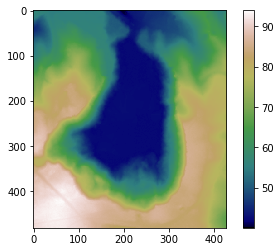

In [16]:
nmt1 = nmt.GetRasterBand(1)
array = nmt1.ReadAsArray()
pyplot.imshow ( array, interpolation='nearest', vmin=min_val, cmap=pyplot.cm.gist_earth)
pyplot.colorbar()

AsciiGrid konwesrja do GeoTif

In [17]:
import os
import gdal

outFileName = 'szmaragdowe_geotif.tif'
nmt = gdal.Open(plik)
srs = osr.SpatialReference()
srs.ImportFromEPSG(2180)


band = nmt.GetRasterBand(1) #wczytujemy jako osgeo.gdal.Dataset

arr = band.ReadAsArray() #wczytujemy jako tablicę
[cols, rows] = arr.shape #konwersja do numpy shape
arr_min = arr.min()
arr_max = arr.max()
arr_mean = int(arr.mean())
print(arr_min)
print(arr_max)
print(arr_mean)

driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(outFileName, rows, cols, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(nmt.GetGeoTransform())#tra geotransform as input
outdata.SetProjection(srs.ExportToWkt())##usatwienie układu współrzędnych 2180
outdata.GetRasterBand(1).WriteArray(arr)
outdata.GetRasterBand(1).SetNoDataValue(-9999)# błedne piksele przyjmą wartość -9999
outdata.FlushCache() # zapis
nmt=None

40.07
93.99
65


# Reklasyfikacja

In [18]:
from osgeo import gdal

driver = gdal.GetDriverByName('GTiff')
file = gdal.Open('szmaragdowe_geotif.tif')
band = file.GetRasterBand(1)
array = band.ReadAsArray()


# reklasyfikacja
array[np.where( array < 50 )] = 1
array[np.where((50 <= array) & (array < 60)) ] = 2
array[np.where((60 <= array) & (array < 70)) ] = 3
array[np.where((70 <= array) & (array < 80)) ] = 4
array[np.where( array >= 80 )] = 5

# zapis pliku
file2 = driver.Create( 'szmaragdowe_geotif_reclass.tif', file.RasterXSize , file.RasterYSize , 1)
file2.GetRasterBand(1).WriteArray(array)

# układ współrzędnych pobierany z pliku źródłowego
proj = file.GetProjection()
georef = file.GetGeoTransform()
file2.SetProjection(proj)
file2.SetGeoTransform(georef)
file2.FlushCache()
array=None

Transformacja rastra za pomocą gdal.translate

In [19]:
from osgeo import gdal

# constants
src = 'szmaragdowe_geotif.tif'
dst = 'szmaragdowe_geotif_translate.tif'
translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-co TFW=YES -a_srs EPSG:2180 -of Gtiff -co COMPRESS=LZW"))

driver = gdal.GetDriverByName('GTiff')


gdal.Translate(dst, src, options=translateoptions)

Tranfsormacja z użyciem biblioteki gdal_translate.exe i modułu subprocess (windows)

In [20]:
from osgeo import gdal
import subprocess
import matplotlib.image as mpimg

path = "B:/OSGeo4W64/bin/"
gdalTranslate = "gdal_translate.exe"
gdalwarp="gdalwarp.exe"
src = "szmaragdowe_geotif.tif"
dst = "szmaragdowe_geotif_translate.tif"
dst2 = "szmaragdowe_geotif_4326.tif"


#subprocess.run(gdalTranslate + " -co TFW=YES -a_srs EPSG:2180 -of Gtiff -co COMPRESS=LZW " + src + " " +  dst)
subprocess.run("B:/OSGeo4W64/bin/" + gdalwarp + " -r near -dstnodata -9999.0 -s_srs EPSG:2180 -t_srs EPSG:4326 -of GTiff " + src + " " + dst2)
show(rasterio.open(dst2))

FileNotFoundError: [WinError 2] The system cannot find the file specified

Metoda mieszana. Dokonaj obliczenia nachyleń na podstawie modelu dem, a nastepnie zreklasyfikuj na 2 klasy: 1 <20; 2>=20 i oblicz ich powierzchnię w [ha]

(208859.5, 1.0, 0.0, 620948.5, 0.0, -1.0)
1.0 14.6154 ha
2.0 6.0142 ha


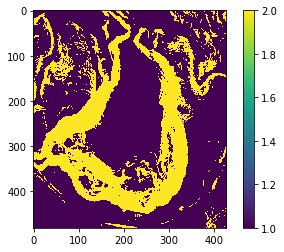

In [21]:
from osgeo import gdal
import subprocess
import numpy as np
import collections
from matplotlib import pyplot

gdaldem = "gdaldem.exe slope"
src = "szmaragdowe_geotif.tif"
dst = "szmaragdowe_geotif_slope.tif"

subprocess.run(gdaldem + " -of Gtiff -b 1 -s 1.0 " + src + " " +  dst)

driver = gdal.GetDriverByName('GTiff')
file = gdal.Open(dst)
band = file.GetRasterBand(1)
slope = band.ReadAsArray()

area_per_pixel=file.GetGeoTransform()
print(area_per_pixel)
# reklasyfikacja
slope[np.where( slope < 20 )] = 1
slope[np.where( slope >= 20 )] = 2


for x in np.unique(slope):
    tot_num_pixels = np.sum(slope == x)
    area = tot_num_pixels * area_per_pixel[1]
    print (x, area/10000, 'ha')


# zapis pliku
file2 = driver.Create( 'szmaragdowe_geotif_slope_reclass.tif', file.RasterXSize , file.RasterYSize , 1)
file2.GetRasterBand(1).WriteArray(slope)

# układ współrzędnych pobierany z pliku źródłowego
proj = file.GetProjection()
georef = file.GetGeoTransform()
file2.SetProjection(proj)
file2.SetGeoTransform(georef)
file2.FlushCache()
pyplot.imshow ( slope, interpolation='nearest', vmin=1)
pyplot.colorbar()